In [1]:
import sqlite3
import pandas as pd
import sqlalchemy
from matplotlib.pyplot import hist
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
from datetime import datetime

In [2]:
engine = sqlalchemy.create_engine('sqlite:///ecom.db')

(array([3., 0., 0., 2., 0., 0., 2., 0., 0., 1.]), array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]), <BarContainer object of 10 artists>)


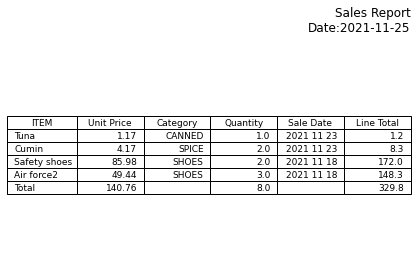

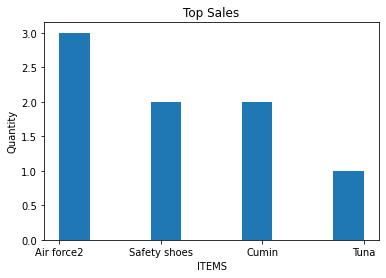

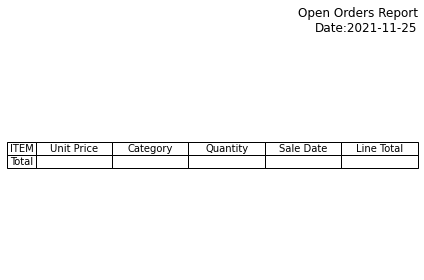

In [3]:
#Sales Report
df = pd.read_sql('SELECT desc as ITEM, price as "Unit Price", tag as Category, qty as Quantity, strftime("%Y %m %d", date) as "Sale Date" FROM cart WHERE status = "C" ORDER BY date DESC', engine)
df2 = df.set_index('ITEM')
df2["Line Total"] = (df2["Unit Price"]*df2["Quantity"]).round(1)
df2.loc['Total'] = df2.sum(numeric_only=True)
df2.fillna('', inplace=True)
df6 = pd.DataFrame(df2)
fig, ax =plt.subplots(1,1)
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
date = str(datetime.date(datetime.now()))
ax.set_title('Sales Report'+'\nDate:'+ date, loc='right')
table = ax.table(cellText=df6.values, rowLabels=df6.index, colLabels=df6.columns, loc='center')
w, h = table[0,1].get_width(), table[0,1].get_height()
table.add_cell(0, -1, w,h, text=df6.index.name, loc='center')
fig.tight_layout()
fig=ax.get_figure()
fig.savefig('Sales_Report.pdf')
#Top Sales Report
df3 = pd.read_sql('SELECT desc as ITEM, price as "Unit Price", tag as Category, qty as Quantity, strftime("%Y %m %d", date) as "Sale Date" FROM cart WHERE status = "C" ORDER BY Quantity DESC', engine)
df4 = df3.head()
fig, ax =plt.subplots()
pp = ax.hist(df4.ITEM, weights=df4.Quantity)
ax.set_title("Top Sales")
ax.set_xlabel('ITEMS')
ax.set_ylabel('Quantity')
print(pp)
fig=ax.get_figure()
fig.savefig('Top_Sales.pdf')
#Open Orders Report
df8 = pd.read_sql('SELECT desc as ITEM, price as "Unit Price", tag as Category, qty as Quantity, strftime("%Y %m %d", date) as "Sale Date" FROM cart WHERE status = "O" ORDER BY date DESC', engine)
df9 = df8.set_index('ITEM')
df9["Line Total"] = (df9["Unit Price"]*df9["Quantity"]).round(1)
df9.loc['Total'] = df9.sum(numeric_only=True)
df9.fillna('', inplace=True)
df7 = pd.DataFrame(df9)
fig, ax =plt.subplots(1,1)
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
date = str(datetime.date(datetime.now()))
ax.set_title('Open Orders Report'+'\nDate:'+ date, loc='right')
table = ax.table(cellText=df7.values, rowLabels=df7.index, colLabels=df7.columns, loc='center')
w, h = table[0,1].get_width(), table[0,1].get_height()
table.add_cell(0, -1, w,h, text=df7.index.name, loc='center')
fig.tight_layout()
fig=ax.get_figure()
fig.savefig('Open_Order_Report.pdf')
